In [10]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# Устанавливаем зерно для повторимости случайных чисел
np.random.seed(107)

# Создаем Датафрейм
df = pd.DataFrame()

X_returns = np.random.normal(0, 1, 100) # генерируем историю доходности
X = pd.Series(np.cumsum(X_returns), name='X') + 50 # суммируем и смещаем на произвольную величину
 
some_noise = np.random.normal(0, 1, 100) # немного шума для второго ряда
Y = X + 5 + some_noise
Y.name = 'Y'
df['X'] = X
df['Y'] = Y
df['S'] = X - Y

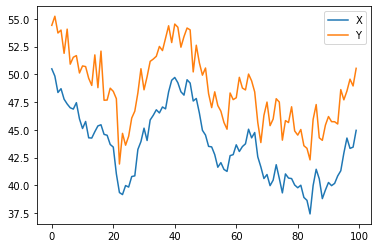

In [12]:
# Рисуем оба ряда
df[['X', 'Y']].plot()
# pd.concat([X, Y], axis=1).plot() # рисуем оба ряда

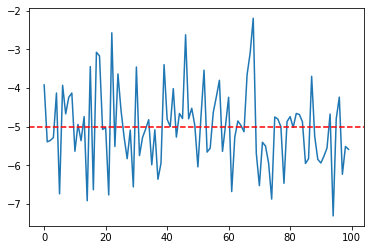

In [13]:
# Рисуем спрэд
df['S'].plot()

# добавляем среднее
plt.axhline(df['S'].mean(), color='red', linestyle='--') 

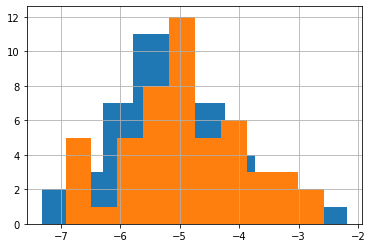

In [14]:
df['S'][50:100].hist()
df['S'][0:50].hist()

In [23]:
def check_coint_corr(X, Y):
    # проверим стационарность двух рядов
    score, pvalue, _ = coint(X,Y)
    # проверим корреляцию двух рядов
    corr = X.corr(Y)
    print("p-значение: %.3f" % pvalue, "корреляция: %s" % corr)

In [24]:
check_coint_corr(df['X'], df['Y'])

p-значение: 0.000 корреляция: 0.9497090646385927


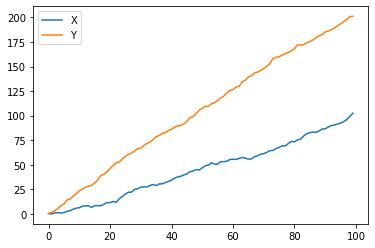

In [17]:
# Корреляция без коинтеграции
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)
X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')
pd.concat([X_diverging, Y_diverging], axis=1).plot()

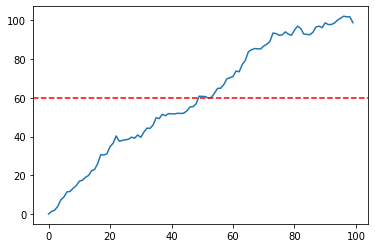

In [18]:
# Рисуем спрэд
(Y_diverging - X_diverging).plot() 
# рисуем среднее
plt.axhline((Y_diverging - X_diverging).mean(), color='red', linestyle='--')

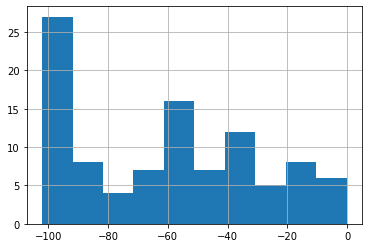

In [19]:
# Рисуем распределение
(X_diverging - Y_diverging).hist()

In [25]:
# Считаем коинтеграцию - p-значением 0.885 (рядом с единицей) - это плохо.
# Считаем Корреляцию - она высокая - это хорошо.
check_coint_corr(X_diverging, Y_diverging)

p-значение: 0.882 корреляция: 0.9931343801275686


(0.0, 40.0)

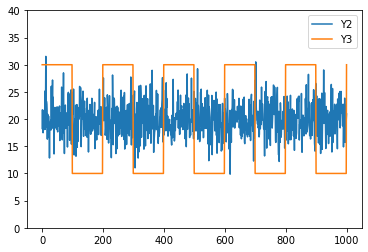

In [26]:
# Коинтеграция без корреляции

# Случайное распределение
Y2 = pd.Series(np.random.normal(0, 1, 1000), name='Y2') * 3 + 20
# Квадратная волна
Y3 = pd.Series([10 if (i//100)%2 else 30 for i in range(1, 1001)], name='Y3')

pd.concat([Y2, Y3], axis=1).plot()
plt.ylim([0, 40])

In [27]:
# Считаем коинтеграцию - p-значением 0.000 (равно нулю) - это хорошо.
# Считаем Корреляцию - она низкая - это плохо.
check_coint_corr(Y2, Y3)

p-значение: 0.000 корреляция: -0.01864964872169064
